In [1]:
# -----Import Libraries-----
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:
#----- Download & Load Dataset-----
path = kagglehub.dataset_download("uciml/iris")
print("Dataset path:", path)
file_path = path + "/Iris.csv"
df = pd.read_csv(file_path)
print(df.head())



Using Colab cache for faster access to the 'iris' dataset.
Dataset path: /kaggle/input/iris
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:

#-----Prepare Data-----
if "Id" in df.columns:
    df = df.drop("Id", axis=1)

#Features and target
X = df.drop("Species", axis=1)
y = df["Species"]



In [4]:
# -----Train-Test Split-----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#X (features) and y(target) are split into training and testing sets.test_size=0.2 means 20% of the dataset is used for testing and 80% for training.
#stratify=y keeps the class distribution the same in both train and test sets.


In [5]:

# -----Feature Scaling-----
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#. scaler = StandardScaler() creates a scale that standardize features so that mean = 0 and Standard deviation = 1
#Formula: 𝑧=𝑥−𝜇/𝜎 where:x = original value,𝜇 = mean of the feature and 𝜎= standard deviation.
#fit() calculates the mean and standard deviation of each feature from the training set only and transform() uses those values to scale the training data.
#Hence,X_train = scaler.fit_transform(X_train) standardized all features in X_train.We do not fit again on test data (to avoid data leakage).Instead, we use the same mean & std from training set to scale test data.
#This ensures train and test are on the same scale.

#Scaling is Needed in KNN because if features are not scaled:Larger values (e.g., Petal length in cm = 6.0) will dominate smaller values (e.g., Sepal width in cm = 2.5).
#This biases distance calculation and degrades performance.By scaling all features contribute equally to distance measurement.



In [6]:
# -----Train KNN Model-----
k = 13   #Sets the number of neighbors in KNN to 13.This means when predicting the class of a sample, the model will look at the 13 nearest neighbors.
knn = KNeighborsClassifier(n_neighbors=k)  #Creates a KNN classifier object from scikit-learn.At this stage, the model is just created, not yet trained.
knn.fit(X_train, y_train)

#Fits (trains) the model on training data.For KNN, training is simple:
#It just stores the training samples (doesn’t build a formula like regression or a tree).Later, during prediction, it compares test points with stored training points using distance



KNeighborsClassifier(n_neighbors=13)

In [7]:
# ----- Predictions-----
y_pred = knn.predict(X_test)

#Uses the trained KNN model (knn) to predict the labels for the test set (X_test).For each sample in X_test:The model looks at the k nearest neighbors in the training set (X_train).
#It checks which class is the majority among those neighbor and assigns that majority class as the prediction.
#All those predictions are collected and stored in y_pred.


In [8]:

# -----Evaluation-----
print("✅ Accuracy:", accuracy_score(y_test, y_pred)) #compares actual labels (y_test) with predicted labels (y_pred).
print("\n---Classification Report:---\n", classification_report(y_test, y_pred))  #gives detailed performance for each class
print("---Confusion Matrix:---\n", confusion_matrix(y_test, y_pred))  #Shows where the model made mistakes.



✅ Accuracy: 0.9666666666666667

---Classification Report:---
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

---Confusion Matrix:---
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


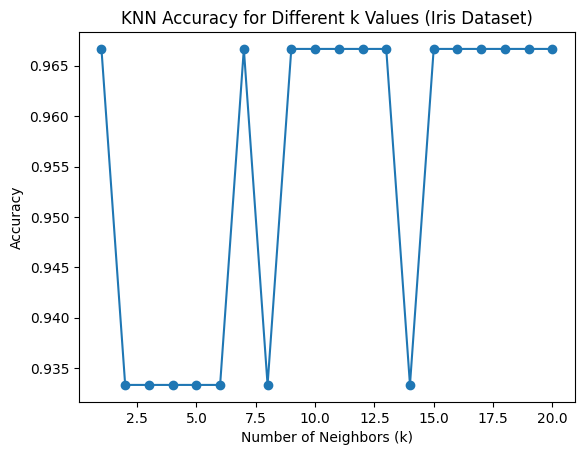

In [9]:

#-----Accuracy vs K Plot-----
accuracies = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, preds))

plt.plot(range(1, 21), accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different k Values (Iris Dataset)")
plt.show()



In [10]:

#-----Predicting New Flower-----

new_flower = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example input
new_flower_scaled = scaler.transform(new_flower)
predicted_species = knn.predict(new_flower_scaled)
print(" Predicted Species for new flower:", predicted_species[0])

 Predicted Species for new flower: Iris-setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
